https://towardsdatascience.com/churn-prediction-770d6cb582a5

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [202]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [203]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

remove samples with all missing values

In [204]:
df = df.dropna(how='all')

remove duplicates

In [205]:
df = df[~df.duplicated()]

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [207]:
total_charges_filter = df['TotalCharges'] == " "

In [208]:
df = df[~total_charges_filter]

In [209]:
df.TotalCharges = pd.to_numeric(df.TotalCharges)

In [210]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

# Exploratory Data Analysis

In [211]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

In [212]:
categorical_features = ['SeniorCitizen','gender','Partner','Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
                        'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                        'Contract', 'PaymentMethod', 'PaperlessBilling']         

In [213]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [214]:
target = ['Churn']

In [215]:
df[numerical_features].describe()

tenure  MonthlyCharges  TotalCharges
count  7032.000000     7032.000000   7032.000000
mean     32.421786       64.798208   2283.300441
std      24.545260       30.085974   2266.771362
min       1.000000       18.250000     18.800000
25%       9.000000       35.587500    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.862500   3794.737500
max      72.000000      118.750000   8684.800000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002378DEA40C8>,
      dtype=object)

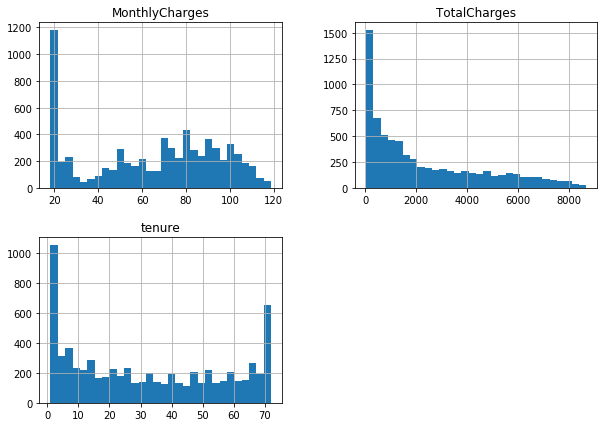

In [216]:
df[numerical_features].hist(bins=30, figsize=(10, 7))

In [217]:
df[df.Churn == 'No'][numerical_features]

tenure  MonthlyCharges  TotalCharges
0          1           29.85         29.85
1         34           56.95       1889.50
3         45           42.30       1840.75
6         22           89.10       1949.40
7         10           29.75        301.90
...      ...             ...           ...
7037      72           21.15       1419.40
7038      24           84.80       1990.50
7039      72          103.20       7362.90
7040      11           29.60        346.45
7042      66          105.65       6844.50

[5163 rows x 3 columns]

In [218]:
df[df.Churn == 'Yes'][numerical_features]

tenure  MonthlyCharges  TotalCharges
2          2           53.85        108.15
4          2           70.70        151.65
5          8           99.65        820.50
8         28          104.80       3046.05
13        49          103.70       5036.30
...      ...             ...           ...
7021      12           59.80        727.80
7026       9           44.20        403.35
7032       1           75.75         75.75
7034      67          102.95       6886.25
7041       4           74.40        306.60

[1869 rows x 3 columns]

We look at distributions of numerical features in relation to the target variable. We can observe that the greater TotalCharges and tenure are the less is the probability of churn.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002378E8EB988>,
      dtype=object)

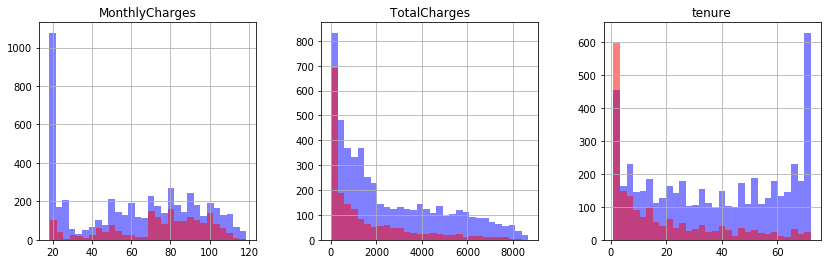

In [219]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
df[df.Churn == 'No'][numerical_features].hist(bins=30, color="blue", alpha=0.5, ax=ax)
df[df.Churn == 'Yes'][numerical_features].hist(bins=30, color="red", alpha=0.5, ax=ax)

## Categorical feature distribution

To analyze categorical features, we use bar charts. We observe that Senior citizens and customers without phone service are less represented in the data.

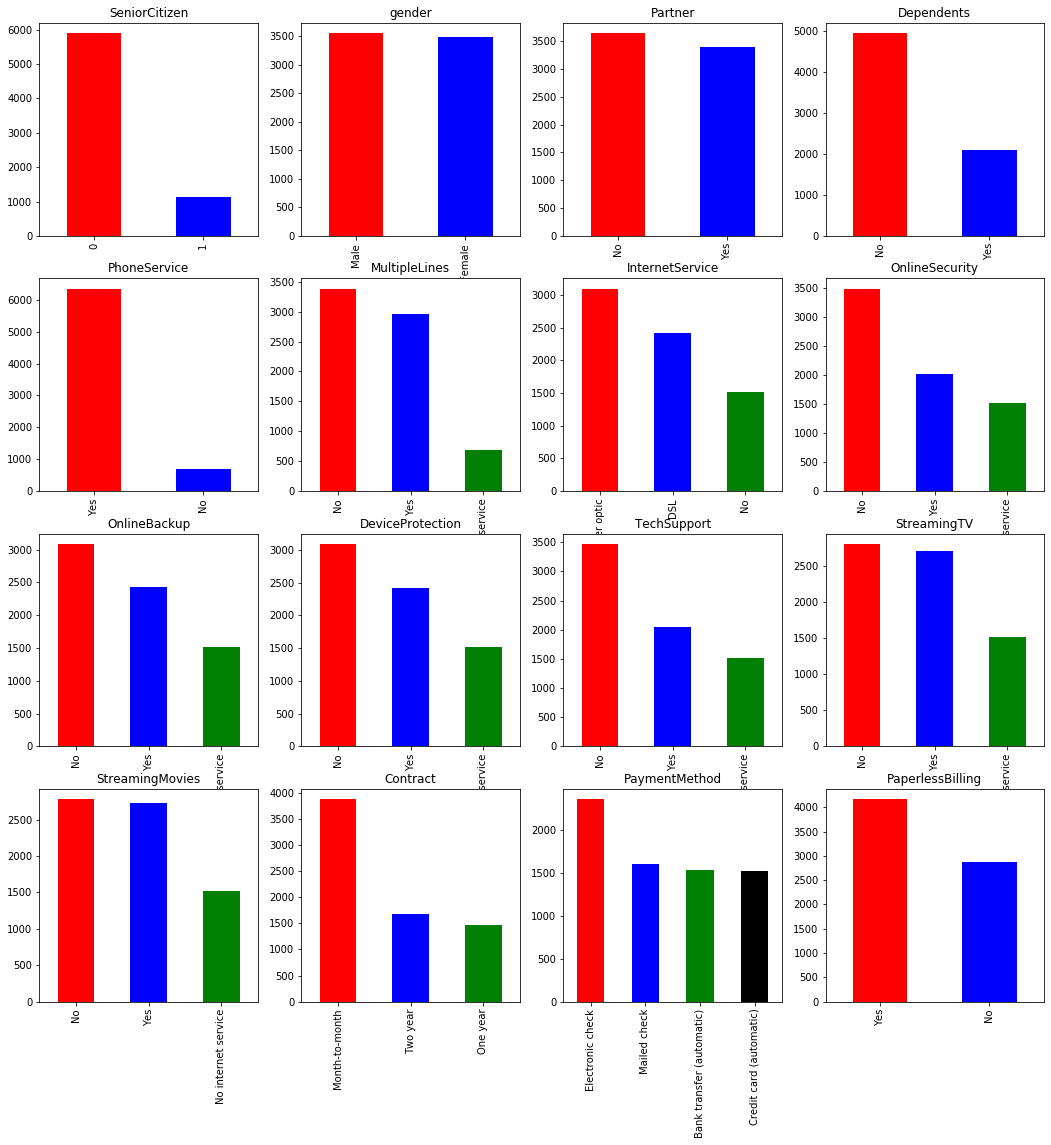

In [220]:
ROWS, COLS = 4, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18, 18))
row, col = 0, 0
for i, categorical_feature in enumerate(categorical_features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    df[categorical_feature].value_counts().plot(kind='bar', color=['red', 'blue', 'green', 'black', 'cyan'],ax=ax[row, col]).set_title(categorical_feature)

The next step is to look at categorical features in relation to the target variable. We do this only for contract feature. Users who have a month-to-month contract are more likely to churn than users with long term contracts.

Text(0.5, 1.0, 'churned')

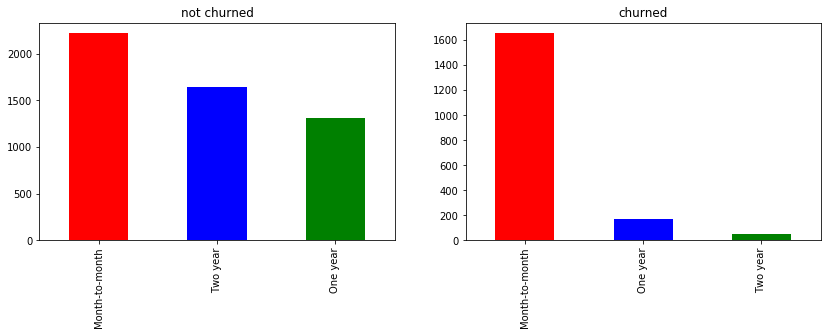

In [221]:
feature = 'Contract'
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
df[df.Churn == 'No'][feature].value_counts().plot(kind='bar', color=['red', 'blue', 'green'], ax=ax[0]).set_title('not churned')
df[df.Churn == 'Yes'][feature].value_counts().plot(kind='bar', color=['red', 'blue', 'green'], ax=ax[1]).set_title('churned')

## Target variable distribution

Target variable distribution shows that we are dealing with an imbalanced problem as there are many more non-churned as churned users. The model would achieve high accuracy as it would mostly predict majority class — users who didn’t churn in our example.

Text(0.5, 1.0, 'churned')

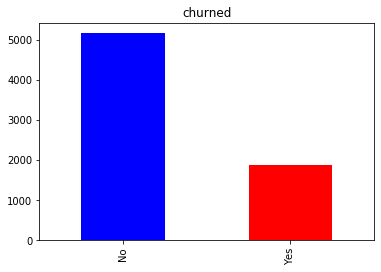

In [222]:
pd.value_counts(df[target].values.flatten()).plot(kind='bar', color=['blue', 'red']).set_title('churned')

## Encoding features

To prepare the dataset for modeling churn, we need to encode categorical features to numbers. This means encoding “Yes”, “No” to 0 and 1 so that algorithm can work with the data. This process is called onehot encoding.

In [223]:
from sklearn.preprocessing import LabelEncoder 

In [224]:
le = LabelEncoder() 

In [260]:
df['gender']= le.fit_transform(df['gender']) 
df['Partner']= le.fit_transform(df['Partner']) 
df['Dependents']= le.fit_transform(df['Dependents']) 
df['PhoneService']= le.fit_transform(df['PhoneService']) 
df['MultipleLines']= le.fit_transform(df['MultipleLines']) 
df['InternetService']= le.fit_transform(df['InternetService']) 
df['OnlineSecurity']= le.fit_transform(df['OnlineSecurity']) 
df['OnlineBackup']= le.fit_transform(df['OnlineBackup']) 
df['DeviceProtection']= le.fit_transform(df['DeviceProtection']) 
df['TechSupport']= le.fit_transform(df['TechSupport']) 
df['StreamingTV']= le.fit_transform(df['StreamingTV'])
df['StreamingMovies']= le.fit_transform(df['StreamingMovies']) 
df['Contract']= le.fit_transform(df['Contract'])
df['PaymentMethod']= le.fit_transform(df['PaymentMethod']) 
df['PaperlessBilling']= le.fit_transform(df['PaperlessBilling']) 

In [261]:
df['Churn']= le.fit_transform(df['Churn']) 

In [262]:
df[categorical_features]

SeniorCitizen  gender  Partner  Dependents  PhoneService  MultipleLines  \
0                 0       0        1           0             0              1   
1                 0       1        0           0             1              0   
2                 0       1        0           0             1              0   
3                 0       1        0           0             0              1   
4                 0       0        0           0             1              0   
...             ...     ...      ...         ...           ...            ...   
7038              0       1        1           1             1              2   
7039              0       0        1           1             1              2   
7040              0       0        1           1             0              1   
7041              1       1        1           0             1              2   
7042              0       1        0           0             1              0   

      InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                   0               0             2                 0   
1                   0               2             0                 2   
2                   0               2             2                 0   
3                   0               2             0                 2   
4                   1               0             0                 0   
...               ...             ...           ...               ...   
7038                0               2             0                 2   
7039                1               0             2                 2   
7040                0               2             0                 0   
7041                1               0             0                 0   
7042                1               2             0                 2   

      TechSupport  StreamingTV  StreamingMovies  Contract  PaymentMethod  \
0               0            0                0         0              2   
1               0            0                0         1              3   
2               0            0                0         0              3   
3               2            0                0         1              0   
4               0            0                0         0              2   
...           ...          ...              ...       ...            ...   
7038            2            2                2         1              3   
7039            0            2                2         1              1   
7040            0            0                0         0              2   
7041            0            0                0         0              3   
7042            2            2                2         2              0   

      PaperlessBilling  
0                    1  
1                    0  
2                    1  
3                    0  
4                    1  
...                ...  
7038                 1  
7039                 1  
7040                 1  
7041                 1  
7042                 1  

[7032 rows x 16 columns]

# Scaling the Features

In [263]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [264]:
df['tenure'] = np.array(df['tenure'])
df['MonthlyCharges'] = np.array(df['MonthlyCharges'])
df['TotalCharges'] = np.array(df['TotalCharges'])

In [265]:
df['tenure'] = preprocessing.scale(df['tenure'])
df['MonthlyCharges'] = preprocessing.scale(df['MonthlyCharges'])
df['TotalCharges'] = preprocessing.scale(df['TotalCharges'])

In [266]:
df['tenure']

0      -1.280248
1       0.064303
2      -1.239504
3       0.512486
4      -1.239504
          ...   
7038   -0.343137
7039    1.612573
7040   -0.872808
7041   -1.158016
7042    1.368109
Name: tenure, Length: 7032, dtype: float64

In [267]:
df['MonthlyCharges']

0      -1.161694
1      -0.260878
2      -0.363923
3      -0.747850
4       0.196178
          ...   
7038    0.664868
7039    1.276493
7040   -1.170004
7041    0.319168
7042    1.357932
Name: MonthlyCharges, Length: 7032, dtype: float64

In [268]:
df['TotalCharges']

0      -0.994194
1      -0.173740
2      -0.959649
3      -0.195248
4      -0.940457
          ...   
7038   -0.129180
7039    2.241056
7040   -0.854514
7041   -0.872095
7042    2.012344
Name: TotalCharges, Length: 7032, dtype: float64

In [269]:
df

customerID  gender  SeniorCitizen  Partner  Dependents    tenure  \
0     7590-VHVEG       0              0        1           0 -1.280248   
1     5575-GNVDE       1              0        0           0  0.064303   
2     3668-QPYBK       1              0        0           0 -1.239504   
3     7795-CFOCW       1              0        0           0  0.512486   
4     9237-HQITU       0              0        0           0 -1.239504   
...          ...     ...            ...      ...         ...       ...   
7038  6840-RESVB       1              0        1           1 -0.343137   
7039  2234-XADUH       0              0        1           1  1.612573   
7040  4801-JZAZL       0              0        1           1 -0.872808   
7041  8361-LTMKD       1              1        1           0 -1.158016   
7042  3186-AJIEK       1              0        0           0  1.368109   

      PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0                0              1                0               0  ...   
1                1              0                0               2  ...   
2                1              0                0               2  ...   
3                0              1                0               2  ...   
4                1              0                1               0  ...   
...            ...            ...              ...             ...  ...   
7038             1              2                0               2  ...   
7039             1              2                1               0  ...   
7040             0              1                0               2  ...   
7041             1              2                1               0  ...   
7042             1              0                1               2  ...   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    2            0            0                0         1   
2                    0            0            0                0         0   
3                    2            2            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 2            2            2                2         1   
7039                 2            0            2                2         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                    1              2       -1.161694     -0.994194      0  
1                    0              3       -0.260878     -0.173740      0  
2                    1              3       -0.363923     -0.959649      1  
3                    0              0       -0.747850     -0.195248      0  
4                    1              2        0.196178     -0.940457      1  
...                ...            ...             ...           ...    ...  
7038                 1              3        0.664868     -0.129180      0  
7039                 1              1        1.276493      2.241056      0  
7040                 1              2       -1.170004     -0.854514      0  
7041                 1              3        0.319168     -0.872095      1  
7042                 1              0        1.357932      2.012344      0  

[7032 rows x 21 columns]

# Train Test Split

We split the dataset to train (75% samples) and test (25% samples).

In [270]:
from sklearn.model_selection import train_test_split

In [271]:
X = df.drop(['Churn', 'customerID'],axis=1)
y = df['Churn']

In [272]:
X

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0          0              0        1           0 -1.280248             0   
1          1              0        0           0  0.064303             1   
2          1              0        0           0 -1.239504             1   
3          1              0        0           0  0.512486             0   
4          0              0        0           0 -1.239504             1   
...      ...            ...      ...         ...       ...           ...   
7038       1              0        1           1 -0.343137             1   
7039       0              0        1           1  1.612573             1   
7040       0              0        1           1 -0.872808             0   
7041       1              1        1           0 -1.158016             1   
7042       1              0        0           0  1.368109             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0               0             2   
1                 0                0               2             0   
2                 0                0               2             2   
3                 1                0               2             0   
4                 0                1               0             0   
...             ...              ...             ...           ...   
7038              2                0               2             0   
7039              2                1               0             2   
7040              1                0               2             0   
7041              2                1               0             0   
7042              0                1               2             0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                    0            0            0                0         0   
1                    2            0            0                0         1   
2                    0            0            0                0         0   
3                    2            2            0                0         1   
4                    0            0            0                0         0   
...                ...          ...          ...              ...       ...   
7038                 2            2            2                2         1   
7039                 2            0            2                2         1   
7040                 0            0            0                0         0   
7041                 0            0            0                0         0   
7042                 2            2            2                2         2   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0                    1              2       -1.161694     -0.994194  
1                    0              3       -0.260878     -0.173740  
2                    1              3       -0.363923     -0.959649  
3                    0              0       -0.747850     -0.195248  
4                    1              2        0.196178     -0.940457  
...                ...            ...             ...           ...  
7038                 1              3        0.664868     -0.129180  
7039                 1              1        1.276493      2.241056  
7040                 1              2       -1.170004     -0.854514  
7041                 1              3        0.319168     -0.872095  
7042                 1              0        1.357932      2.012344  

[7032 rows x 19 columns]

In [273]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

In [274]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

In [275]:
X_train

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
3166       1              0        1           0 -0.750577             1   
4333       1              0        1           0 -0.057929             1   
1927       1              0        1           1  0.593974             1   
2315       1              0        1           1  0.105047             1   
858        0              0        1           0  1.368109             1   
...      ...            ...      ...         ...       ...           ...   
3778       1              0        0           0 -1.198760             1   
5199       0              0        0           0  0.756950             1   
5235       1              0        0           0 -0.954296             1   
5399       0              0        0           0  0.716206             1   
862        1              1        1           0 -0.506113             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
3166              0                0               0             0   
4333              2                1               2             2   
1927              2                1               0             0   
2315              2                0               0             0   
858               2                1               2             2   
...             ...              ...             ...           ...   
3778              2                0               0             0   
5199              2                1               0             2   
5235              2                1               2             0   
5399              0                2               1             1   
862               0                1               0             2   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
3166                 0            2            0                0         0   
4333                 0            2            0                0         0   
1927                 2            2            2                2         0   
2315                 0            2            2                2         1   
858                  0            2            0                0         1   
...                ...          ...          ...              ...       ...   
3778                 0            0            0                0         0   
5199                 2            2            2                2         1   
5235                 0            0            0                0         0   
5399                 1            1            1                1         1   
862                  0            0            0                0         0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
3166                 0              0       -0.531788     -0.714239  
4333                 1              1        0.856001      0.285205  
1927                 1              0        1.414440      1.251053  
2315                 1              0        0.287589      0.166680  
858                  0              2        0.804478      1.595025  
...                ...            ...             ...           ...  
3778                 0              0       -0.478603     -0.946811  
5199                 1              2        1.552388      1.508839  
5235                 1              2        0.543541     -0.661274  
5399                 0              0       -1.497422     -0.571007  
862                  1              2        0.294237     -0.361686  

[5274 rows x 19 columns]

In [276]:
y_train

3166    0
4333    0
1927    1
2315    0
858     0
       ..
3778    0
5199    0
5235    0
5399    0
862     1
Name: Churn, Length: 5274, dtype: int64

# Decision Trees

In [277]:
from sklearn.tree import DecisionTreeClassifier

In [278]:
dtree = DecisionTreeClassifier()

In [279]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Prediction and Evaluation

In [280]:
y_score = dtree.predict(X_test)

In [281]:
from sklearn.metrics import classification_report,confusion_matrix

In [282]:
print(classification_report(y_test, y_score))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1300
           1       0.45      0.48      0.47       458

    accuracy                           0.71      1758
   macro avg       0.63      0.64      0.63      1758
weighted avg       0.72      0.71      0.71      1758



In [299]:
from sklearn.metrics import recall_score
recall_average = recall_score(y_test, y_score, average="binary", pos_label=0)

In [300]:
print(recall_average)

0.7923076923076923


In [301]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.35


In [293]:
print(confusion_matrix(y_test,y_score))

[[1030  270]
 [ 237  221]]


# Tree Visualization

In [458]:
conda install -c https://conda.binstar.org/sstromberg pydot

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Haddadi\Anaconda3

  added / updated specs:
    - pydot


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.0                |           py37_1         2.8 MB
    graphviz-2.38              |       hfd603c8_2        29.3 MB
    pydot-1.4.1                |           py37_0          43 KB
    ------------------------------------------------------------
                                           Total:        32.2 MB

The following NEW packages will be INSTALLED:

  graphviz           pkgs/main/win-64::graphviz-2.38-hfd603c8_2
  pydot              pkgs/main/win-64::pydot-1.4.1-py37_0

The following packages will be UPDATED:

  conda                                       4.7.12-py37_0 --> 4.8.0-py37_1




pydot-1.4.1          | 43 KB     |            |   0% 
pydot-1.4.1          | 43 KB    

In [472]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[0:19])
features

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges']

In [478]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Random Forests

Now let's compare the decision tree model to a random forest.

In [308]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [309]:
rfc_pred = rfc.predict(X_test)

In [310]:
print(confusion_matrix(y_test,rfc_pred))

[[1165  135]
 [ 246  212]]


In [311]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1300
           1       0.61      0.46      0.53       458

    accuracy                           0.78      1758
   macro avg       0.72      0.68      0.69      1758
weighted avg       0.77      0.78      0.77      1758



In [312]:
from sklearn.metrics import recall_score
recall_average = recall_score(y_test, rfc_pred, average="binary", pos_label=0)

In [313]:
print("rfc recall avg = ", recall_average)

rfc recall avg =  0.8961538461538462


In [314]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, rfc_pred)

print('rfc Average precision-recall score: {0:0.2f}'.format(
      average_precision))

rfc Average precision-recall score: 0.42
